#  Punto 2

Investiga y explica una estrategia para graficar embeddings en dos dimensiones. Grafica las palabras más similares a los nombres de los personajes principales en cada libro.
Encuentra relaciones interesantes utilizando razonamiento analógico.

Importación de bibliotecas y dependencias a usar en el ejercicio

In [1]:
import os
import re
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report
import string
from sklearn.calibration import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Embedding, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
from gensim.models import KeyedVectors

La siguiente implementación, busca palabras similares a los personajes principales en los libros, reduce los embeddings a dos dimensiones mediante PCA y grafica estas palabras, permitiendo explorar relaciones semánticas entre ellas.

El algoritmo PCA (Análisis de Componentes Principales, por sus siglas en inglés), es una técnica de reducción de dimensionalidad utilizada en el procesamiento de datos y machine learning. Su propósito es transformar un conjunto de datos de alta dimensión (por ejemplo, los vectores de palabras generados por Word2Vec con dimensiones de 300, 400 o 500) en un conjunto de datos de menor dimensión, preservando la mayor cantidad de información posible (es decir, la varianza de los datos).

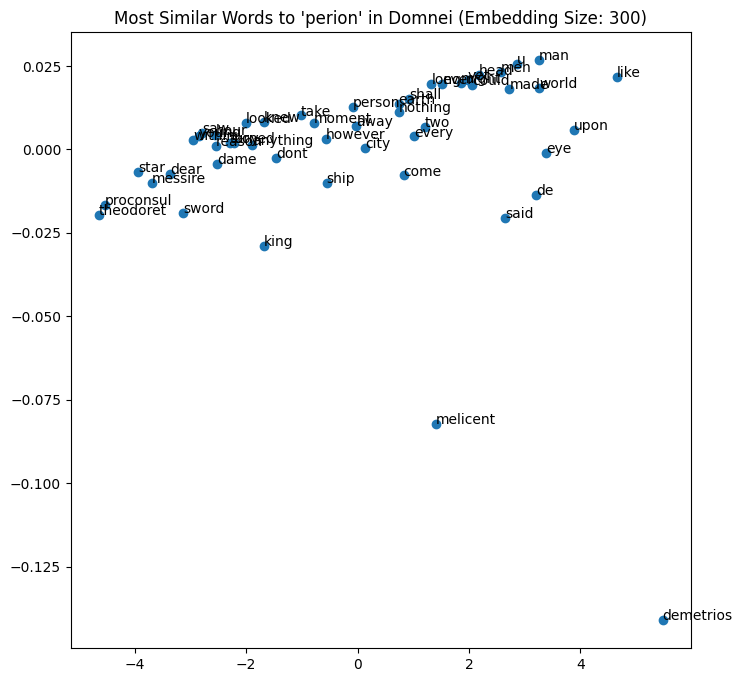

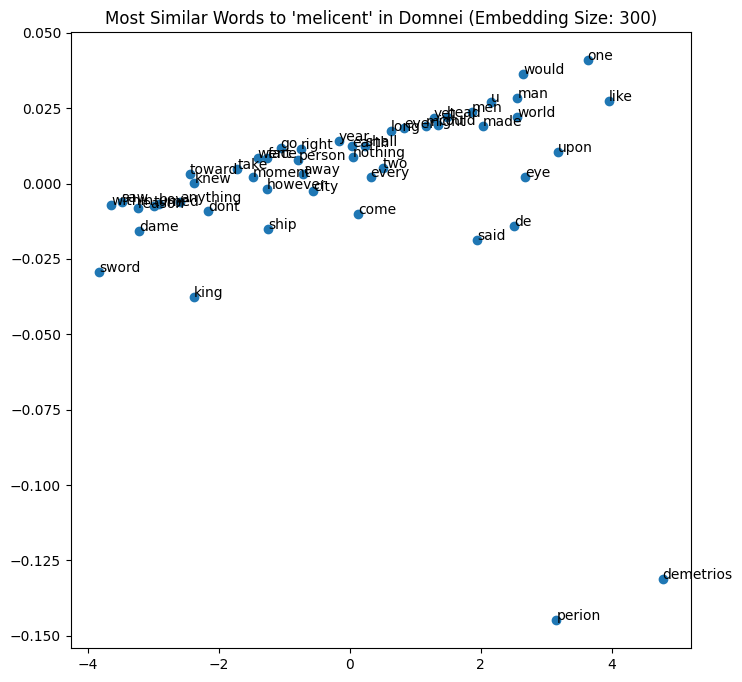

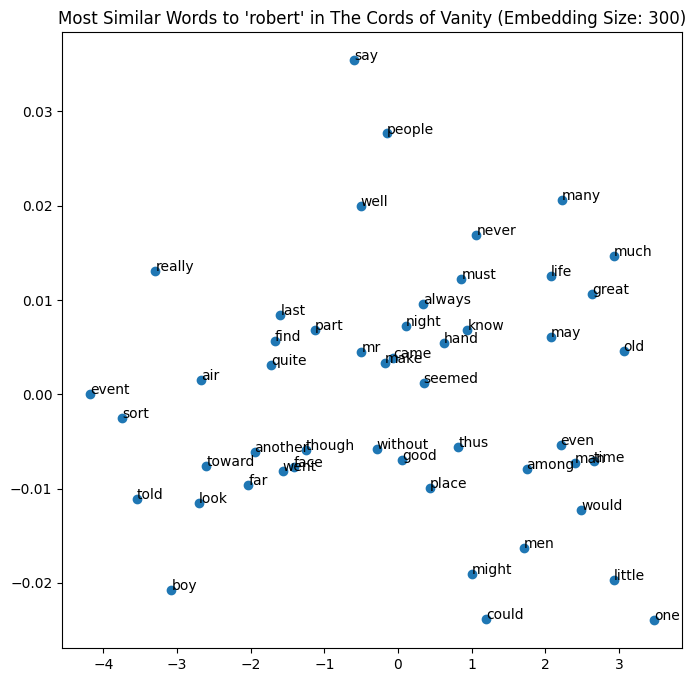

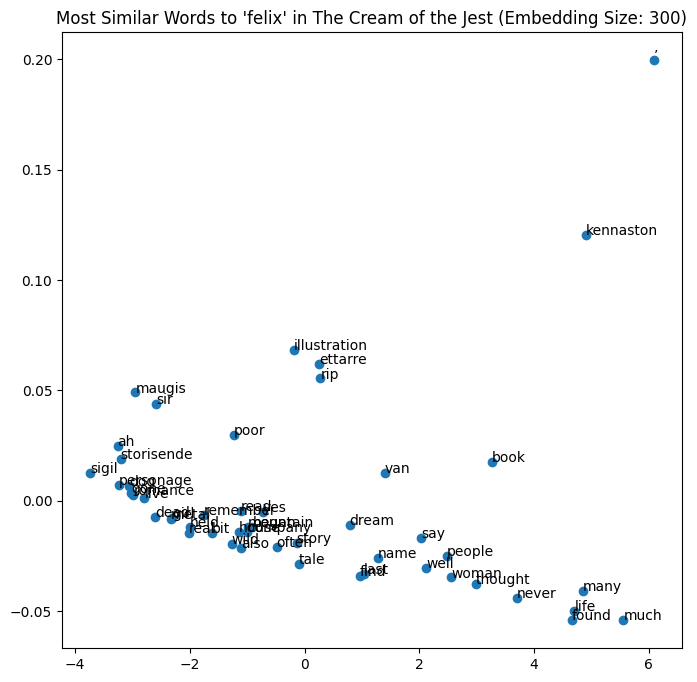

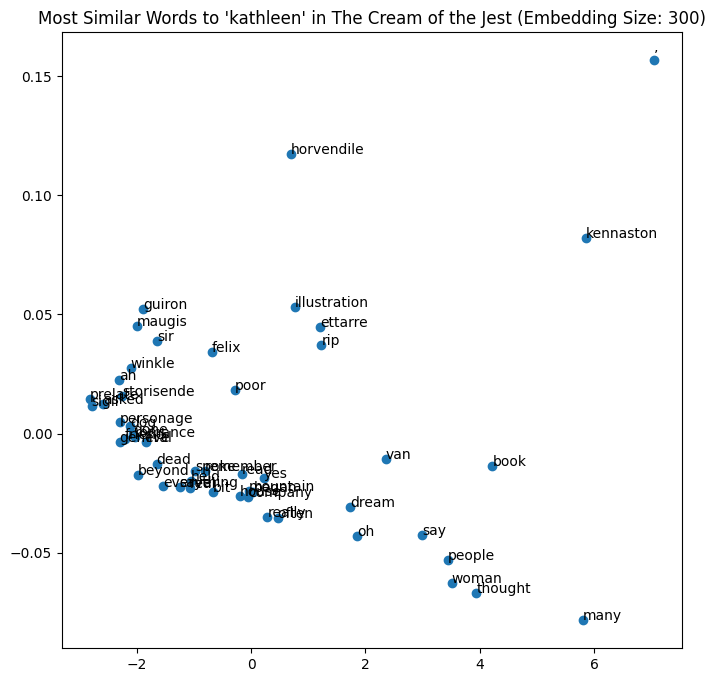

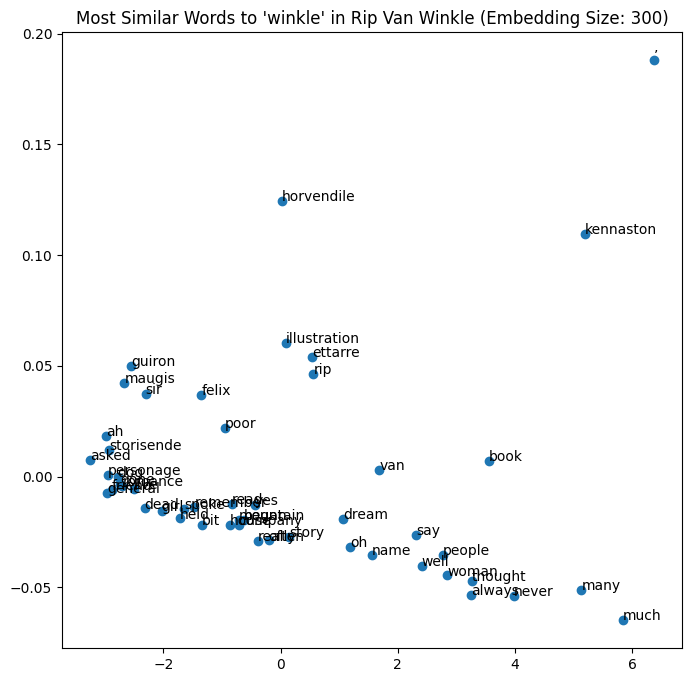

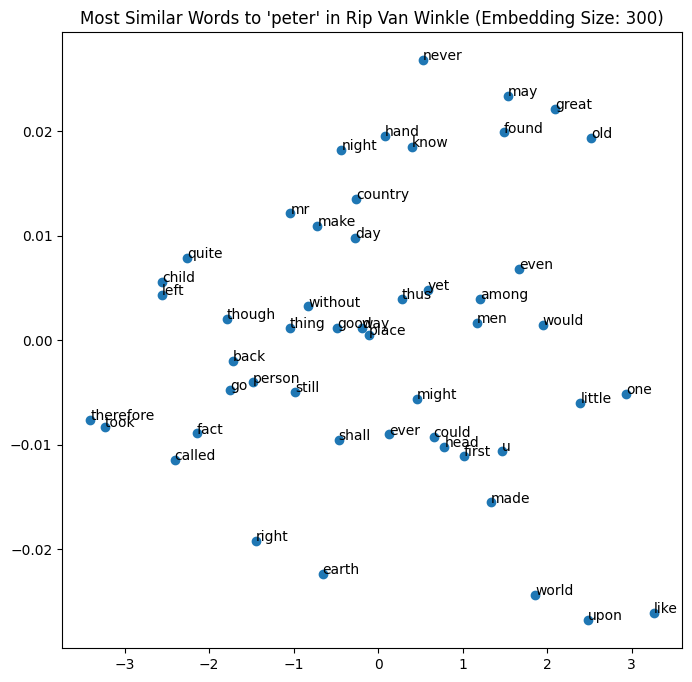

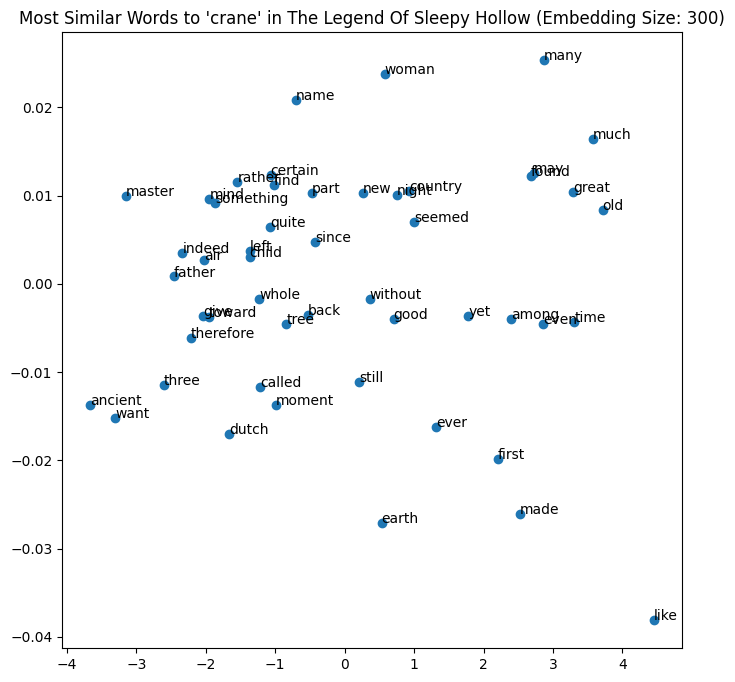

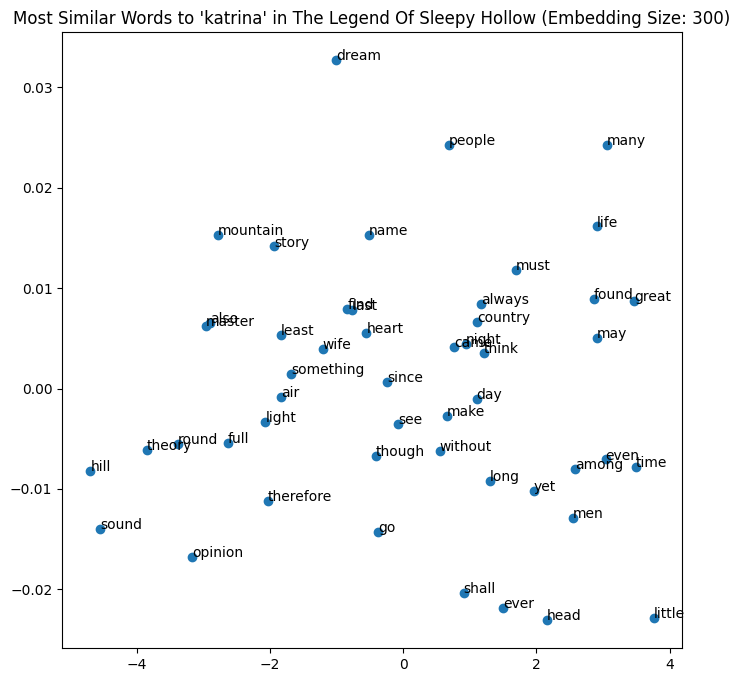

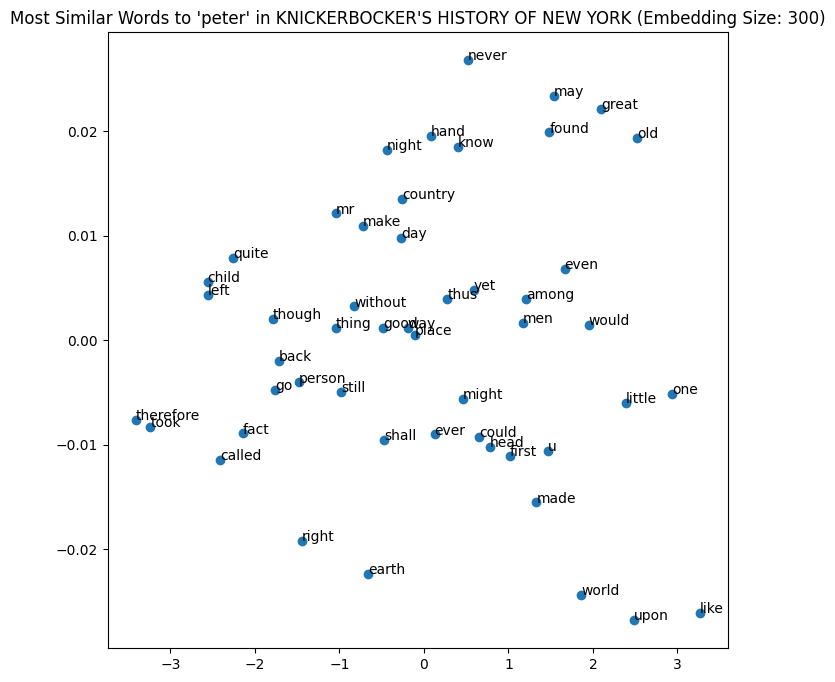

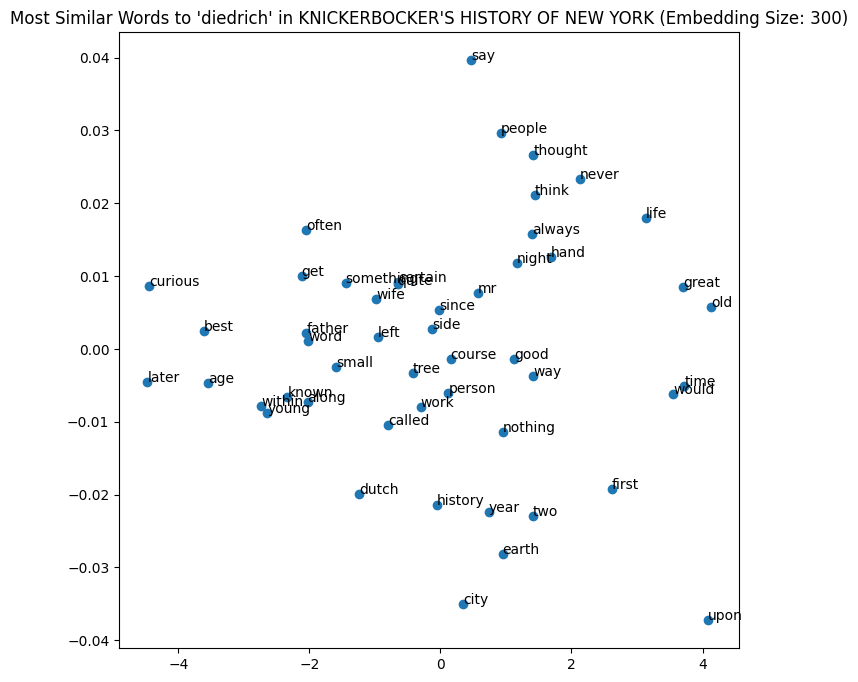

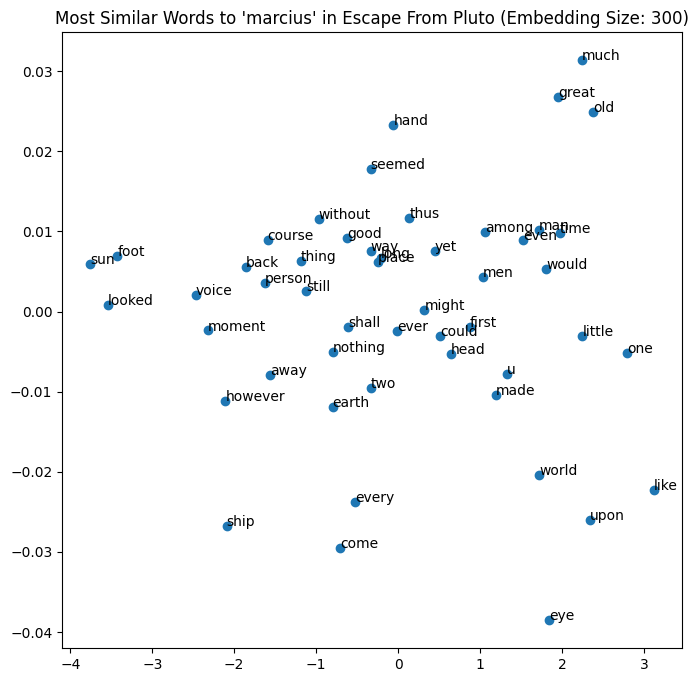

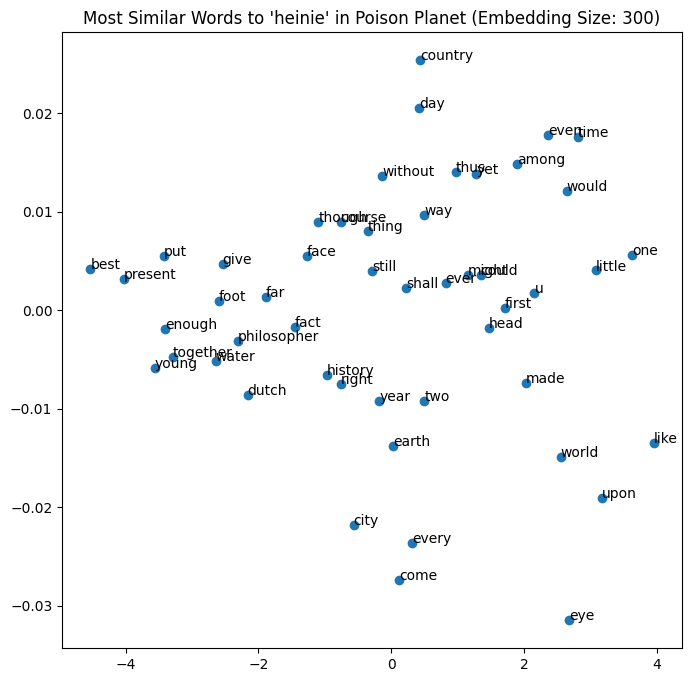

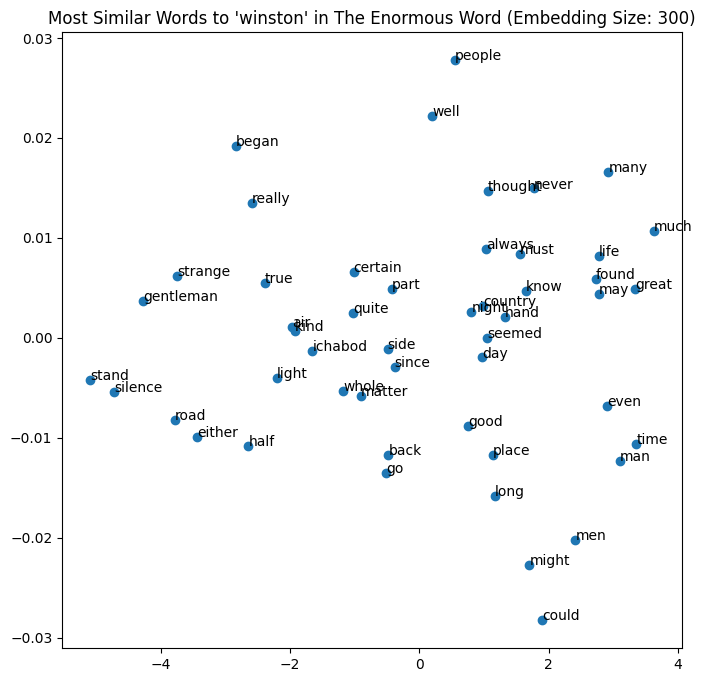

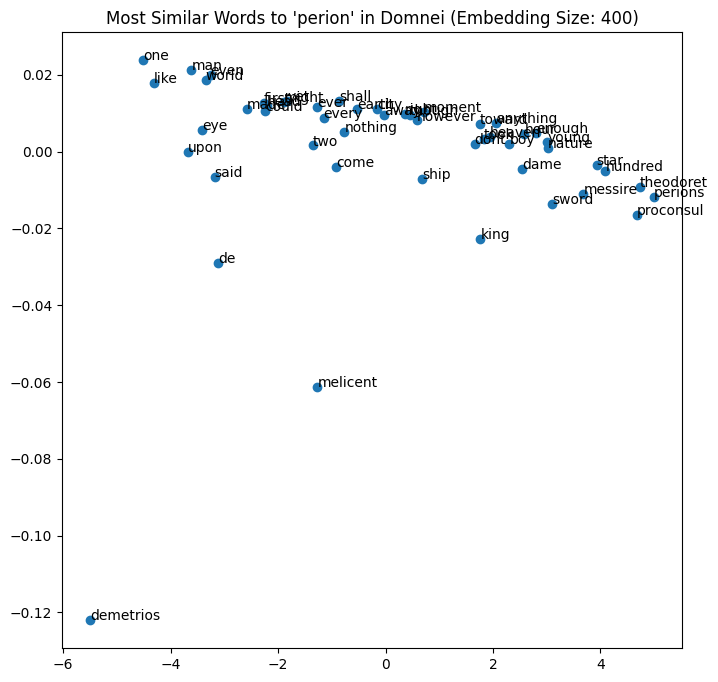

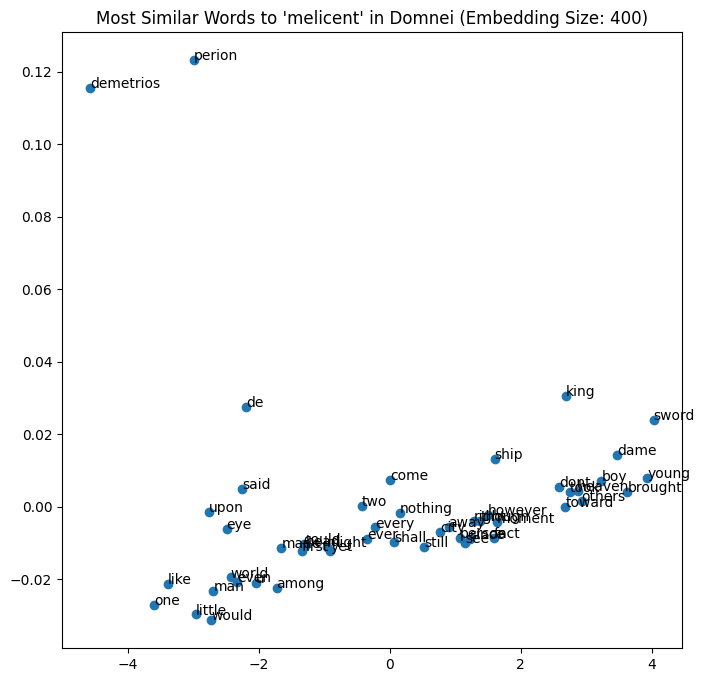

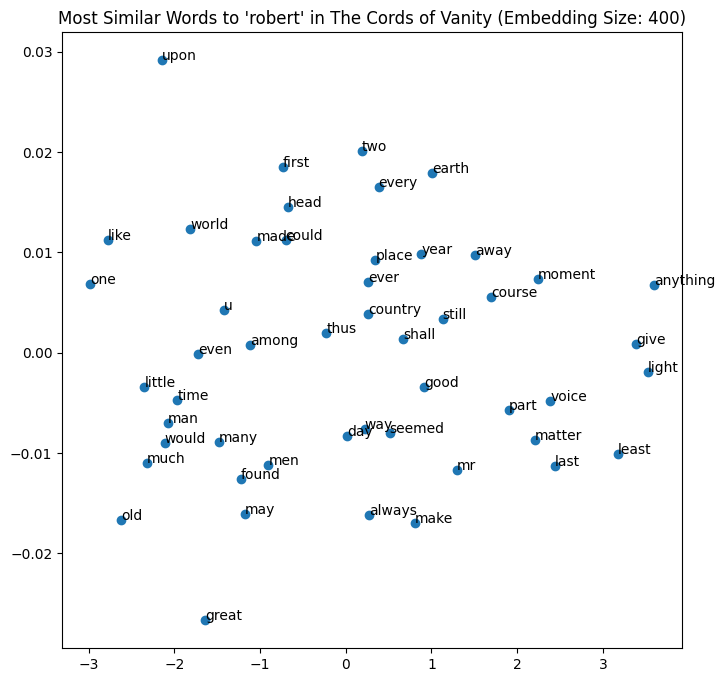

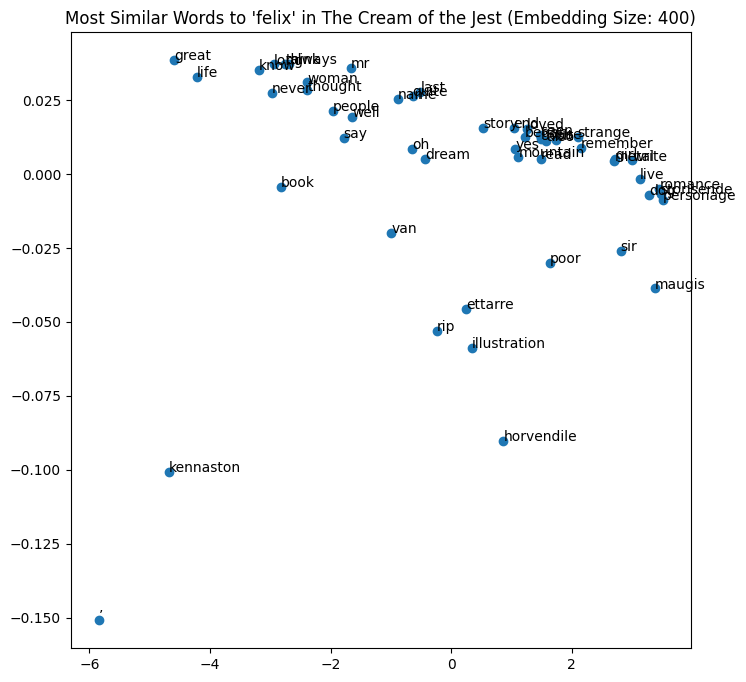

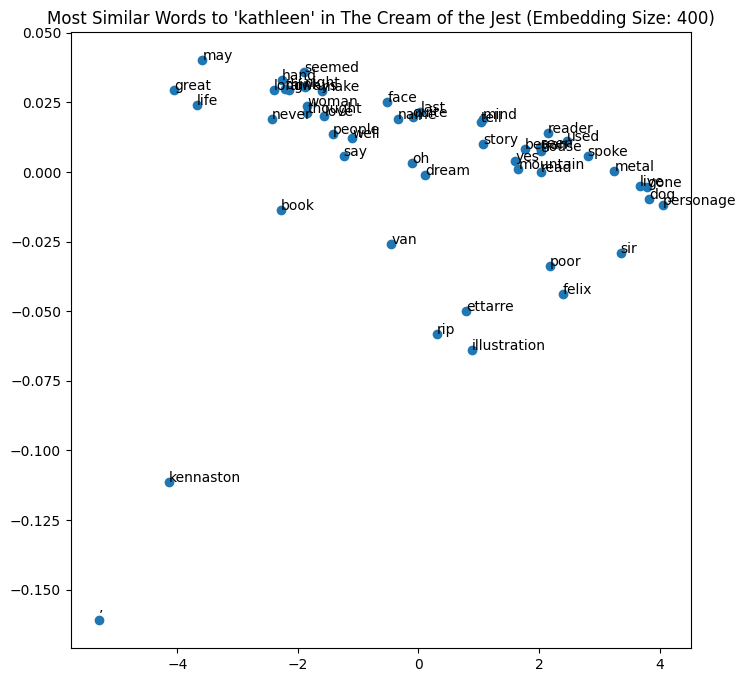

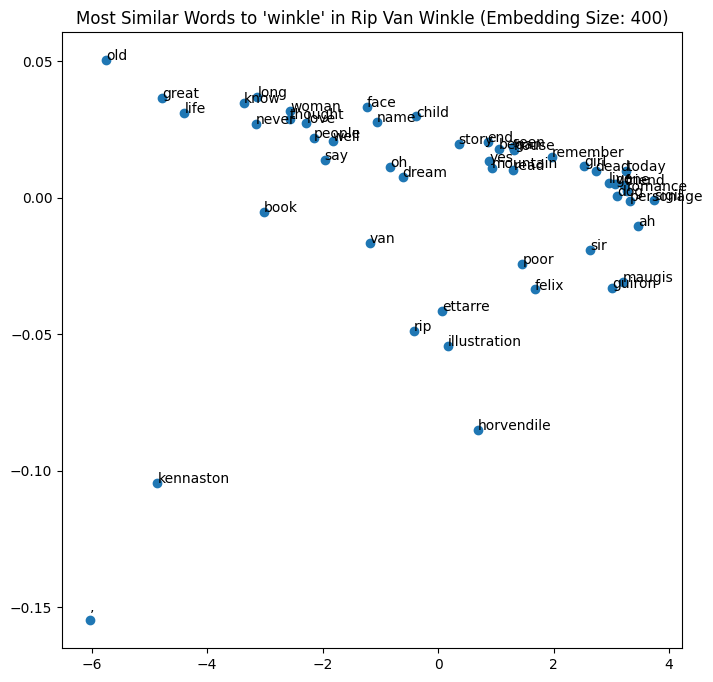

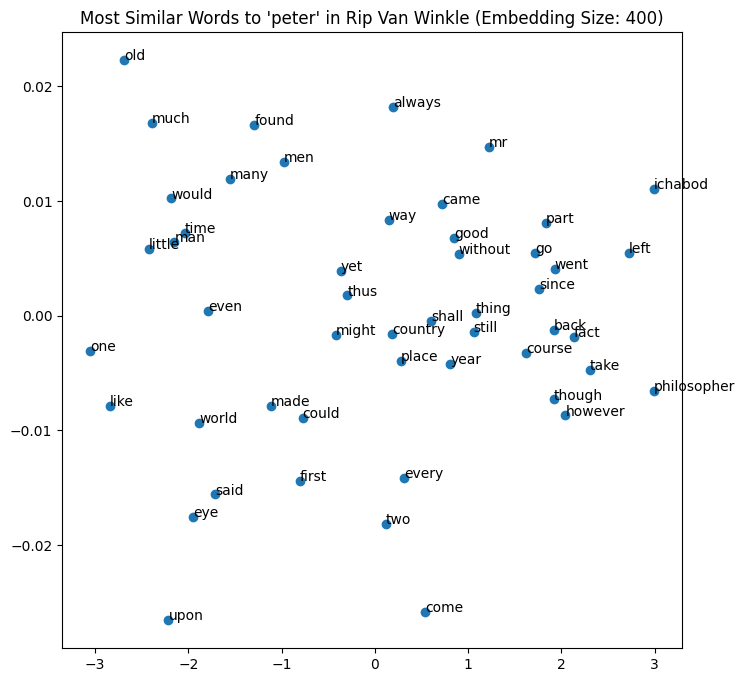

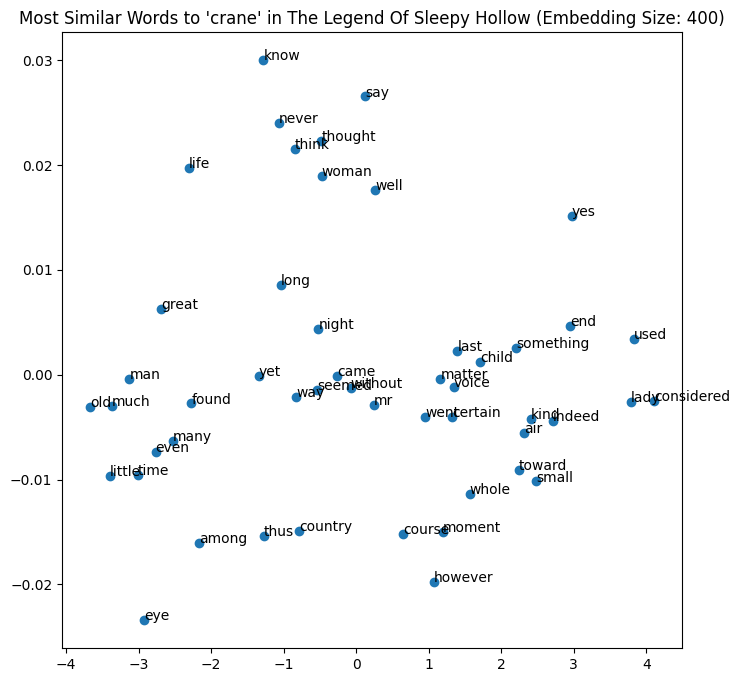

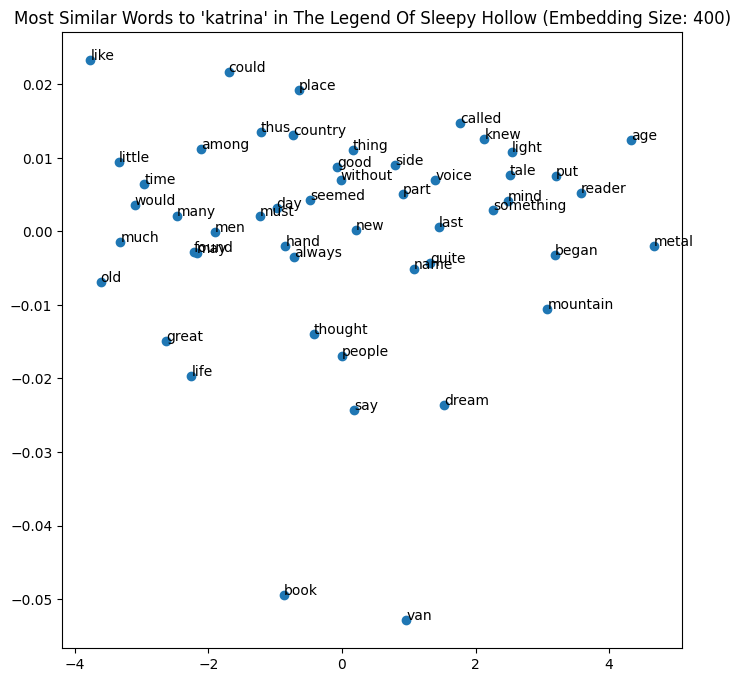

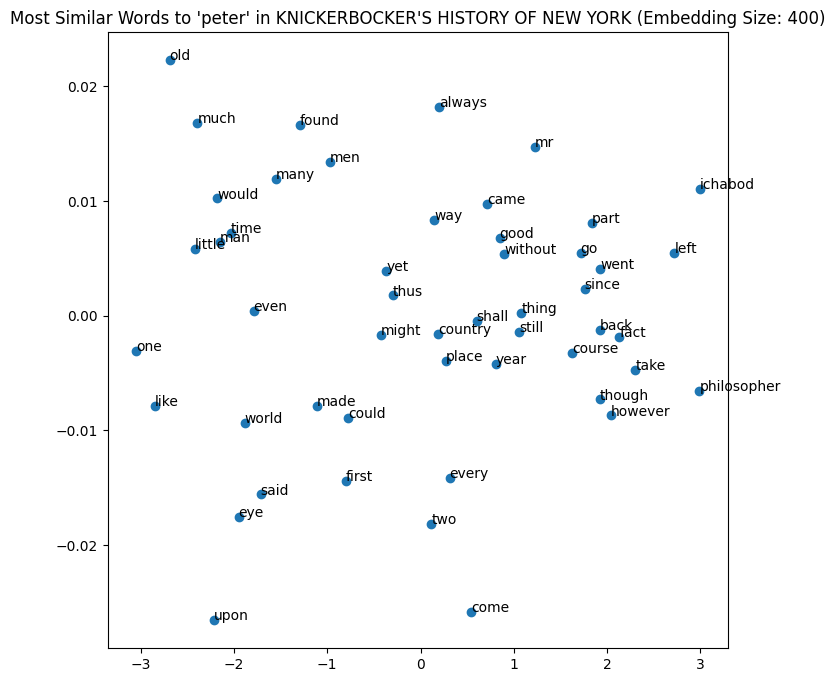

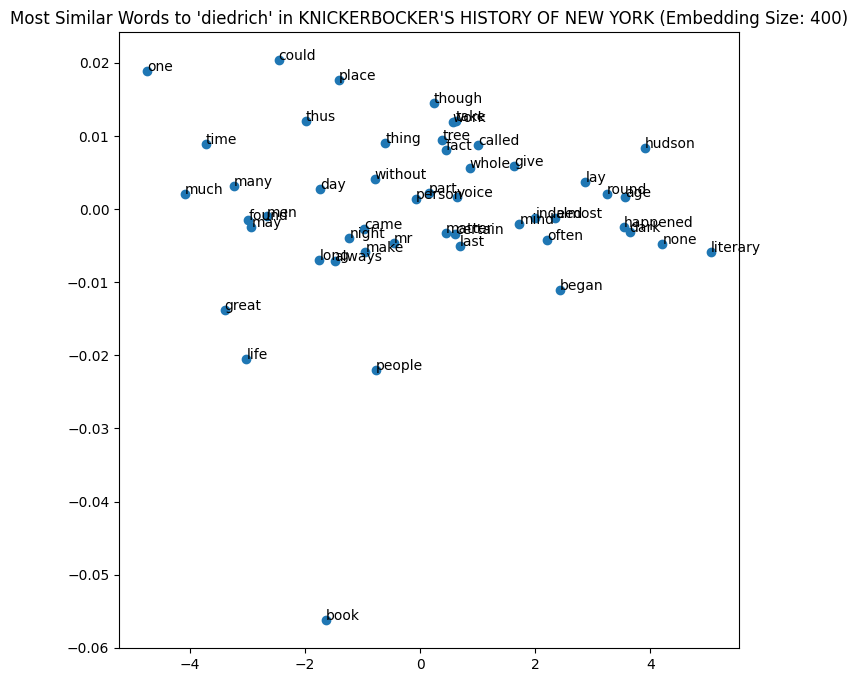

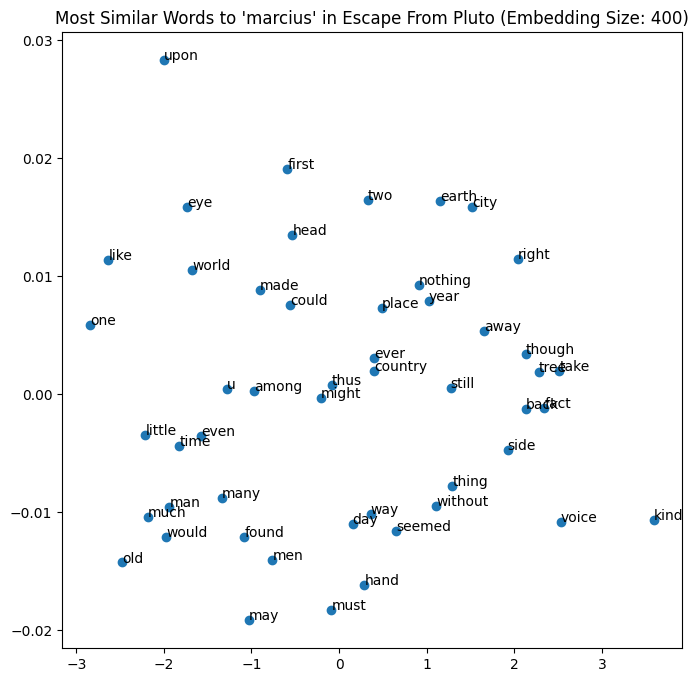

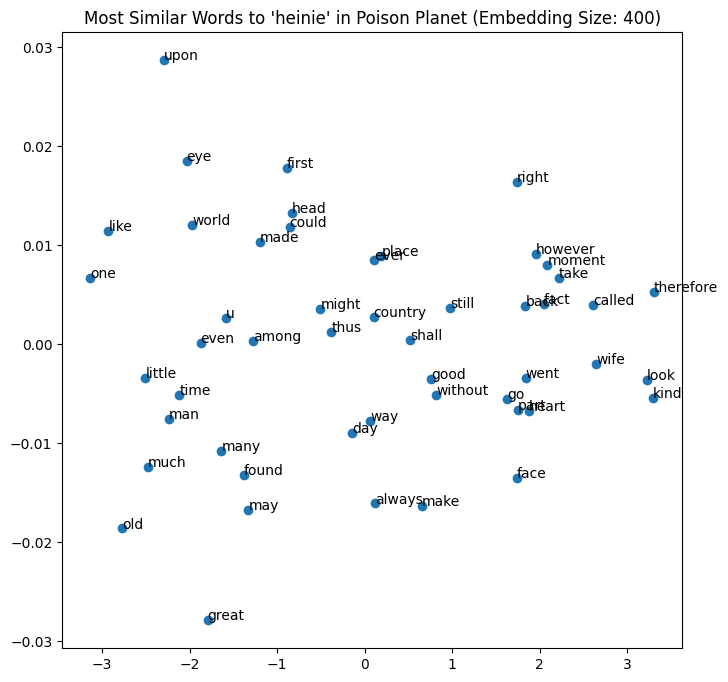

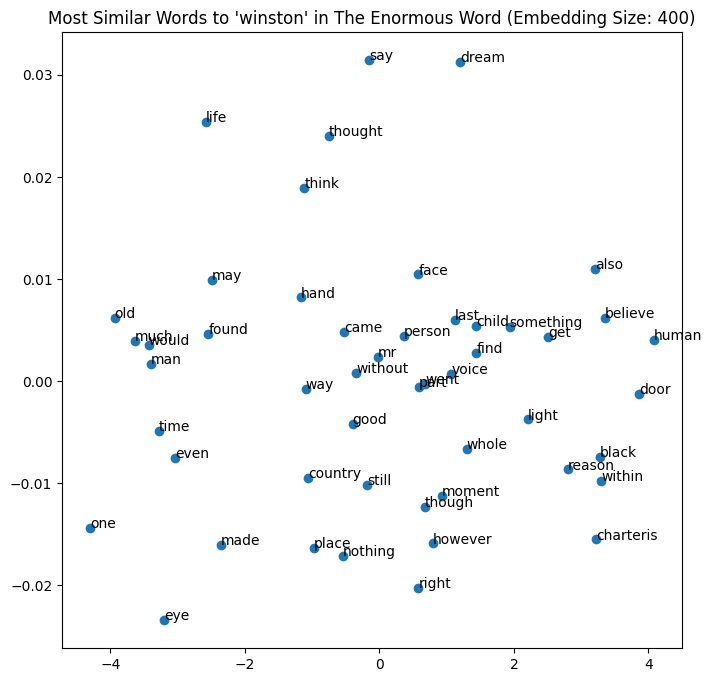

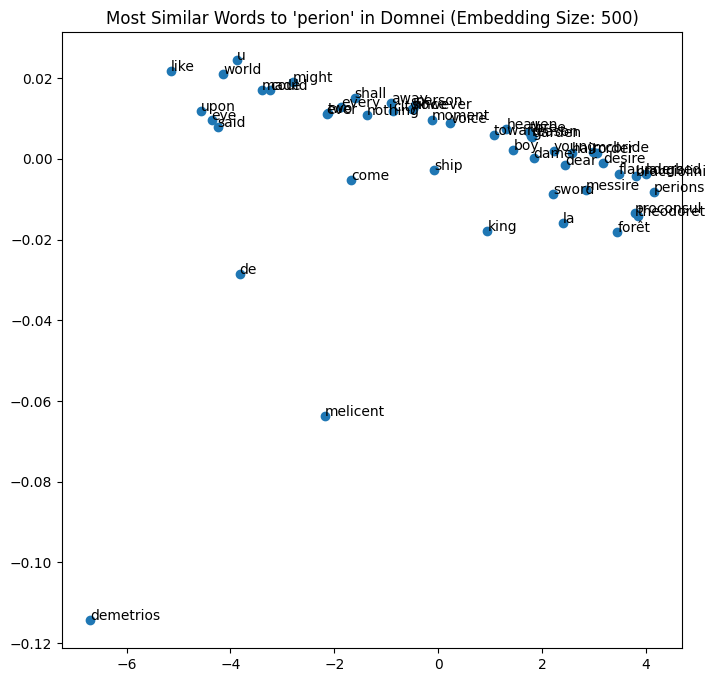

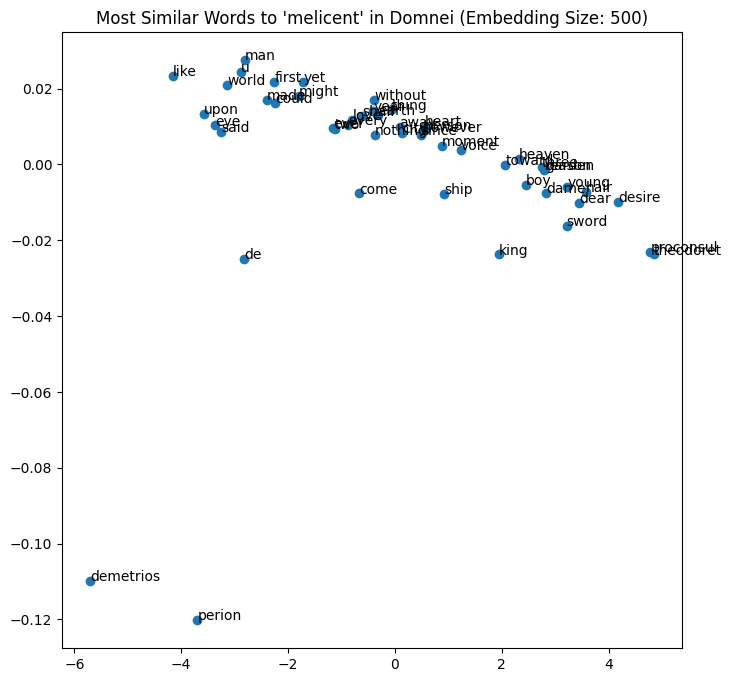

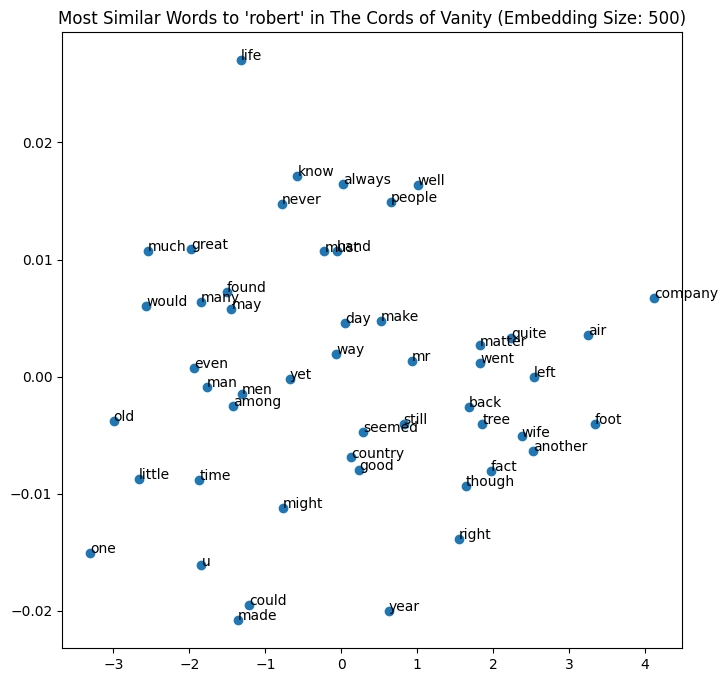

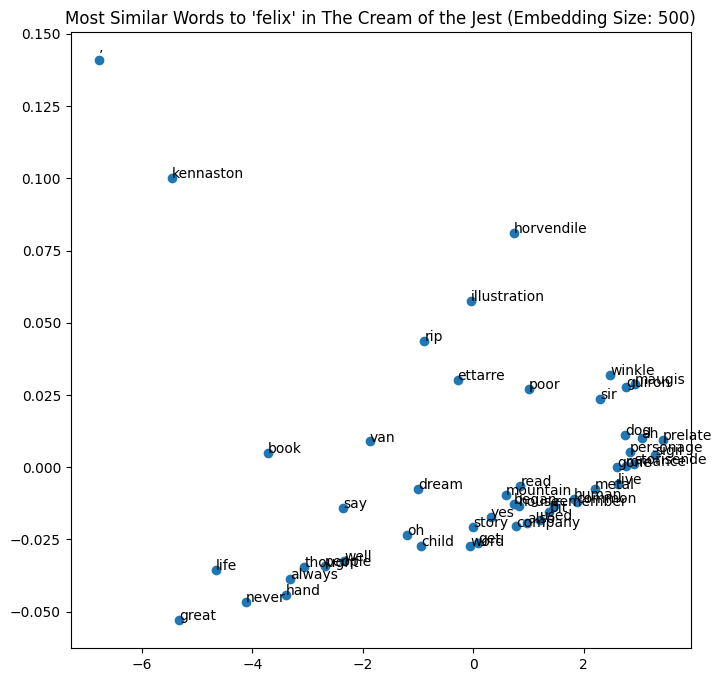

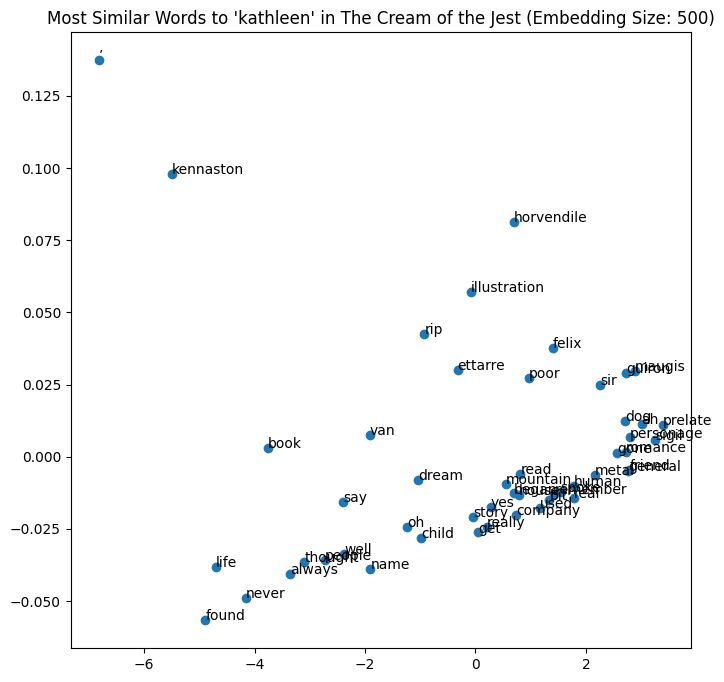

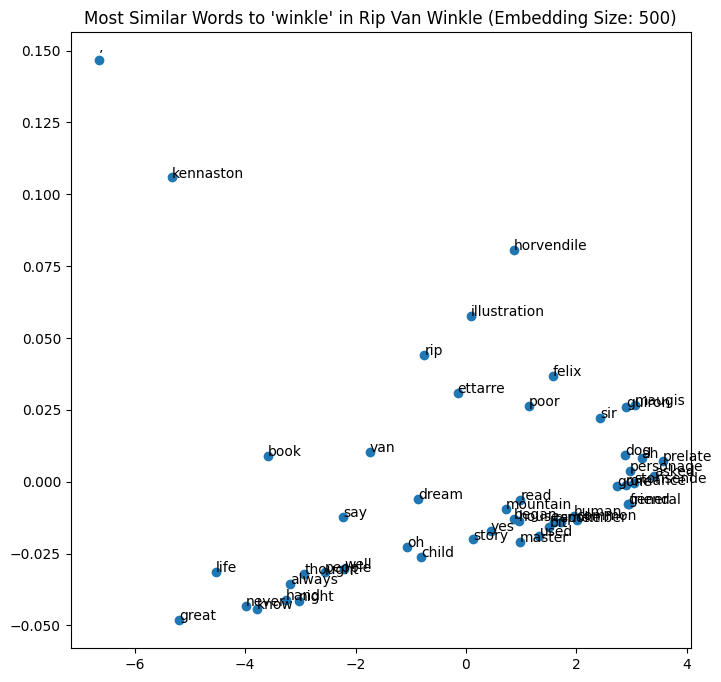

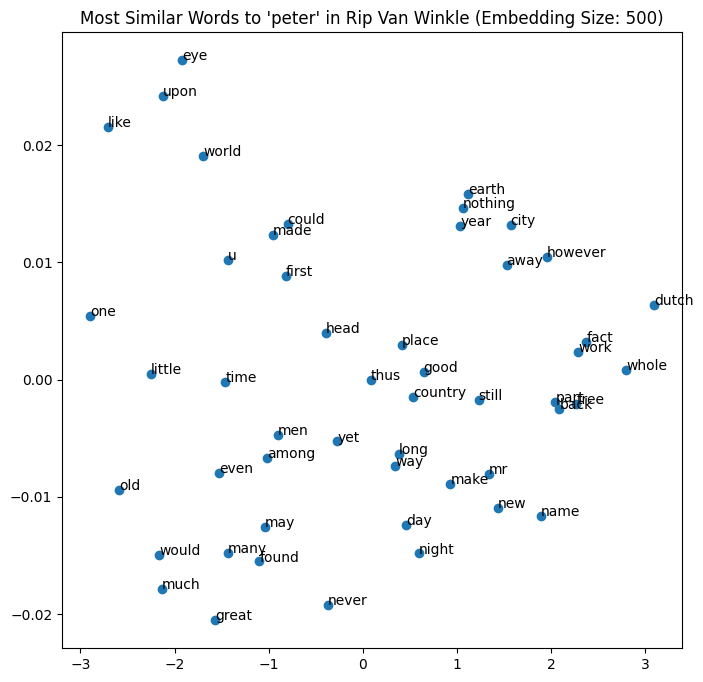

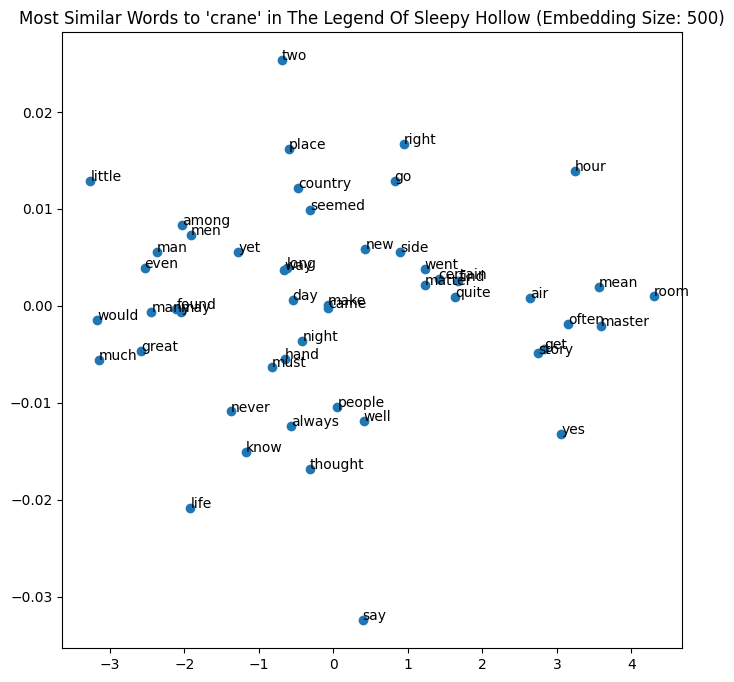

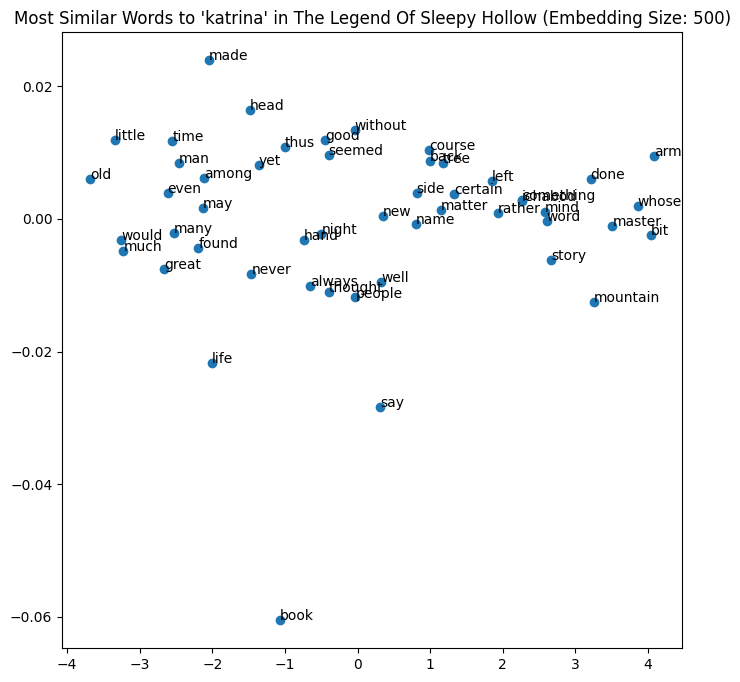

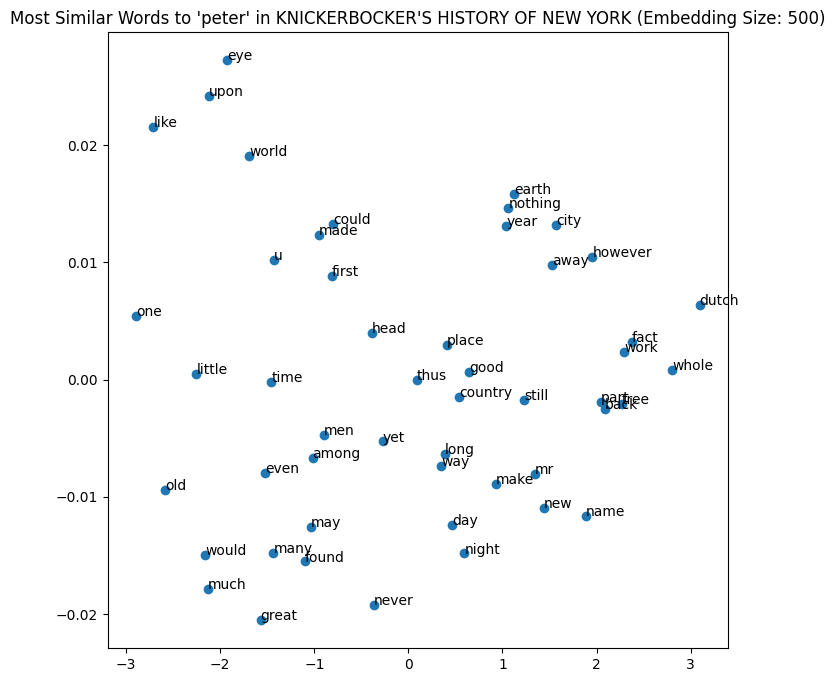

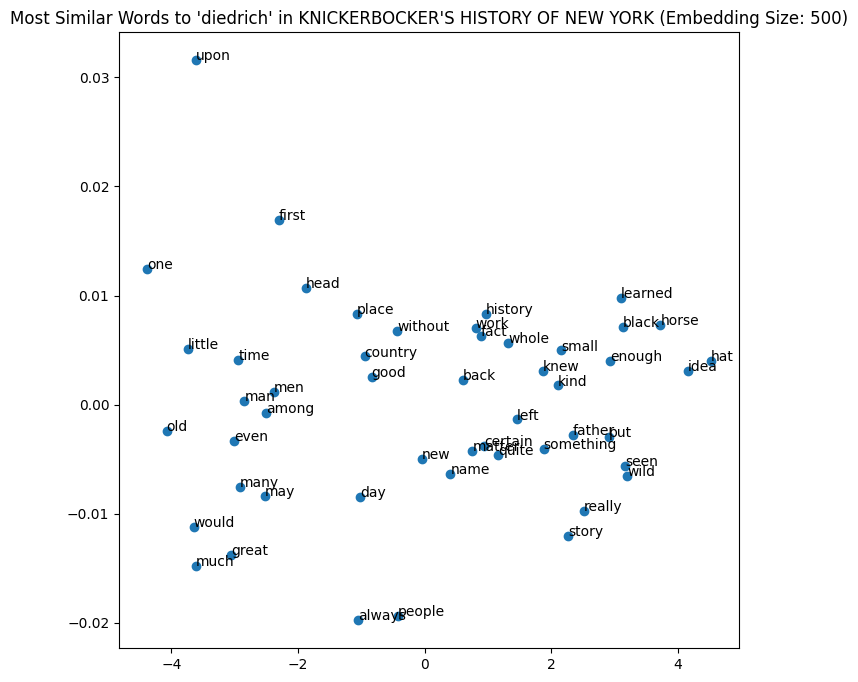

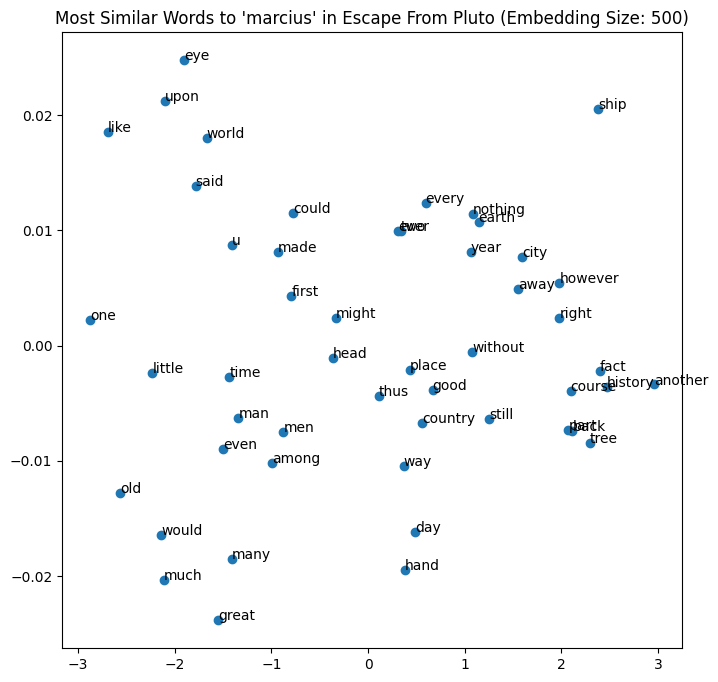

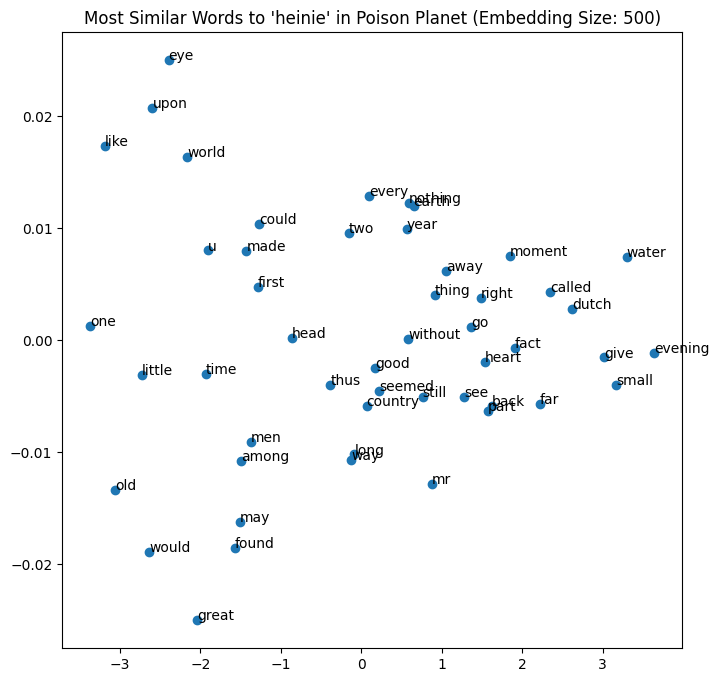

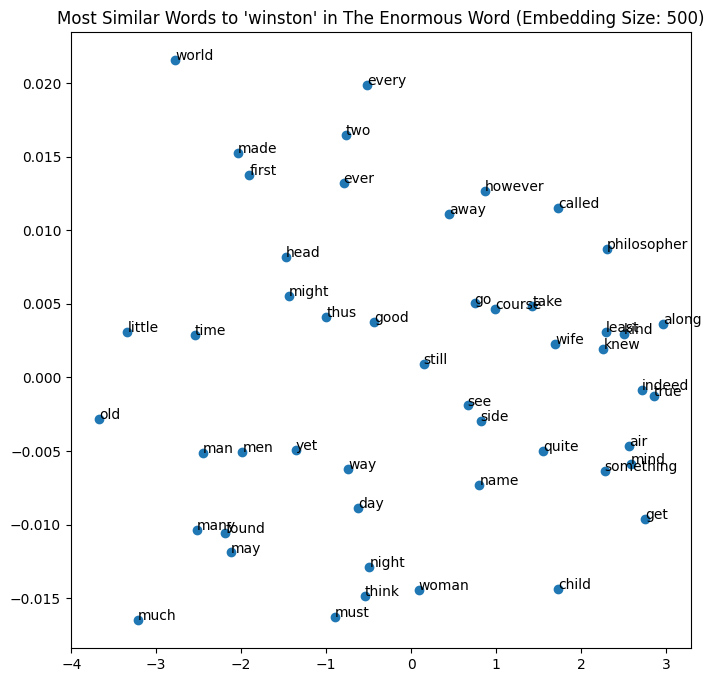

In [2]:
# Diccionario que asocia los libros con los nombres de los personajes principales
main_characters = {
    "Domnei": ["perion", "melicent"],
    "The Cords of Vanity": ["robert"],
    "The Cream of the Jest": ["felix", "kathleen"],
    "Rip Van Winkle" : ["winkle", "peter"],
    "The Legend Of Sleepy Hollow" : ["crane", "katrina"],
    "KNICKERBOCKER'S HISTORY OF NEW YORK" : ["peter", "diedrich"],
    "Escape From Pluto": ["marcius"],
    "Poison Planet": ["heinie"],
    "The Enormous Word": ["winston"]
}

# Lista de tamaños de embedding que se entrenarán
embedding_sizes = [300, 400, 500]
group_code = "G4"

# Bucle para cargar modelos de embeddings preentrenados para cada tamaño (300, 400, 500)
for size in embedding_sizes:
    # Cargar el modelo de Word2Vec entrenado con el tamaño de embedding específico
    model = Word2Vec.load(f'Books_{size}_{group_code}.model')
    
    # Iterar sobre los libros y personajes principales
    for book, characters in main_characters.items():
        # Iterar sobre los personajes principales del libro actual
        for char in characters:
            similar_words = model.wv.most_similar(char, topn=50)
            words = [word for word, _ in similar_words]
            word_vectors = np.array([model.wv[word] for word in words])
            # Aplicar PCA para reducir la dimensionalidad a 2 componentes (de alta dimensión a 2D)
            pca = PCA(n_components=2)
            reduced_vectors = pca.fit_transform(word_vectors)
            # Graficar las palabras en el espacio reducido a 2 dimensiones
            plt.figure(figsize=(8, 8))
            plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])
            for i, word in enumerate(words):
                plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
            plt.title(f"Most Similar Words to '{char}' in {book} (Embedding Size: {size})")
            plt.show()